In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
from google.colab import files
uploaded = files.upload()

Saving log.jpg to log.jpg
Saving shoe.xlsx to shoe.xlsx


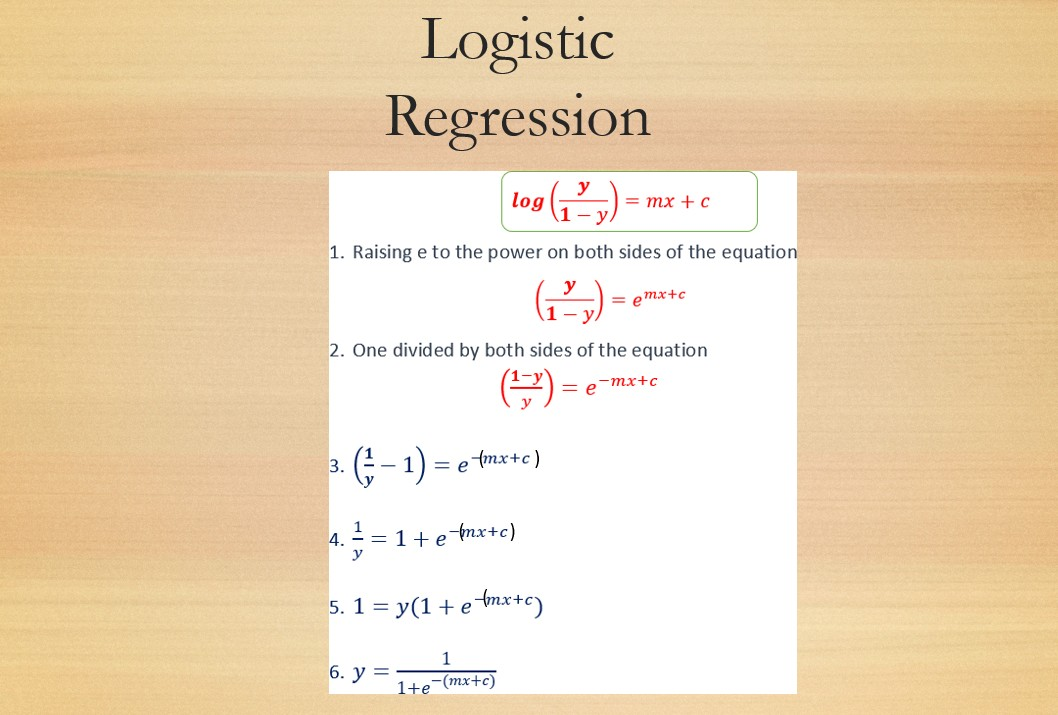

In [7]:
from IPython.display import Image, display
display(Image(filename='log.jpg'))  # Must match exact uploaded filename

In [8]:
df =pd.read_excel("shoe.xlsx")

In [9]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [10]:
df.shape

(40, 2)

In [11]:
df.isnull().sum()

,0
size(cm),0
class(y),0


In [12]:
df.describe()

,size(cm)
count,40.000000
mean,10.067375
std,0.532646
min,9.150000
25%,9.615000
50%,10.137500
75%,10.482500
max,11.050000


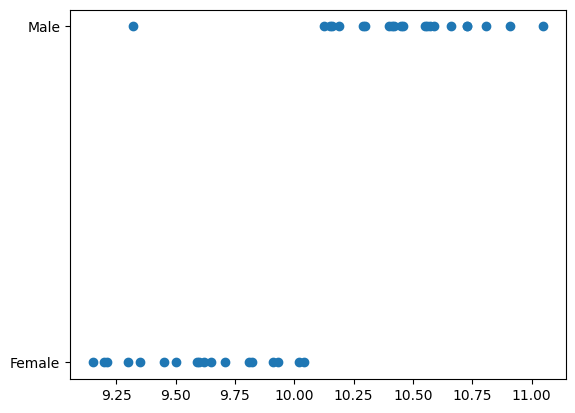

In [16]:
plt.scatter(df['size(cm)'], df['class(y)'])

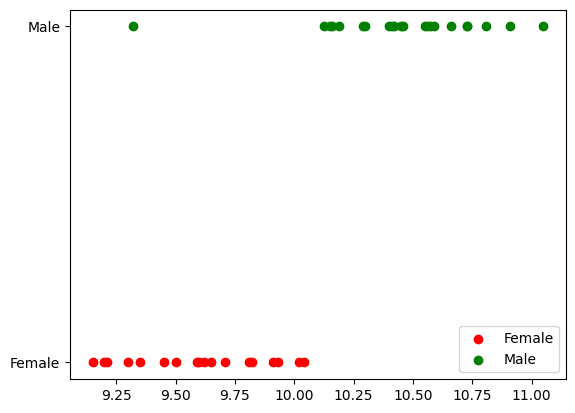

In [18]:
df0 = df[df['class(y)'] =='Female']
df1 =df[df['class(y)'] == 'Male']
plt.scatter(df0['size(cm)'],df0['class(y)'],color = 'red',label ='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color = 'Green',label ='Male')
plt.legend()

# ***Prepeocessing***

In [19]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])#replace

In [20]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


# ***TrainTest Split***

In [21]:
from sklearn.model_selection import train_test_split as tts

In [49]:
x_train,x_test,y_train,y_test = tts(df[['size(cm)']],df['class(y)'],test_size=0.2,random_state=251)

In [50]:
x_train.head()

,size(cm)
29,10.73
36,9.21
30,10.04
22,9.20
39,9.32


In [51]:
y_train.head()

,class(y)
29,1
36,0
30,0
22,0
39,1


# ***Logistic Regression***

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
reg = LogisticRegression()

In [54]:
reg.fit(x_train,y_train)

LogisticRegression()

In [55]:
m = reg.coef_
m

array([[2.28668765]])

In [56]:
 c= reg.intercept_
 c

array([-22.63300949])

In [57]:
reg.predict_proba(x_test) #predict_proba -> show the probability

array([[0.79686498, 0.20313502],
       [0.24075548, 0.75924452],
       [0.33886917, 0.66113083],
       [0.08990849, 0.91009151],
       [0.48155866, 0.51844134],
       [0.73571431, 0.26428569],
       [0.60569992, 0.39430008],
       [0.71289309, 0.28710691]])

In [58]:
pred =reg.predict(x_test)
pred

array([0, 1, 1, 1, 1, 0, 0, 0])

In [59]:
y_test.head()

,class(y)
35,0
32,1
12,1
13,1
17,0


In [60]:
Log_score = reg.score(x_test,y_test)
Log_score

0.875

In [61]:
mae1 = mean_absolute_error(y_test,pred)
mae1

0.125

In [62]:
mse1 = mean_squared_error(y_test,pred)
mse1

0.125

In [63]:
data = {'Name':['Logistic_mae','Logistic_mse','Logistic_accuracy'],'Accuracy' : [mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data = data)

In [65]:
df_after_pred.head()

,Name,Accuracy
0,Logistic_mae,0.125
1,Logistic_mse,0.125
2,Logistic_accuracy,0.875


In [66]:
!pip install seaborn

In [67]:
import seaborn as sns

<Axes: xlabel='Accuracy', ylabel='Name'>

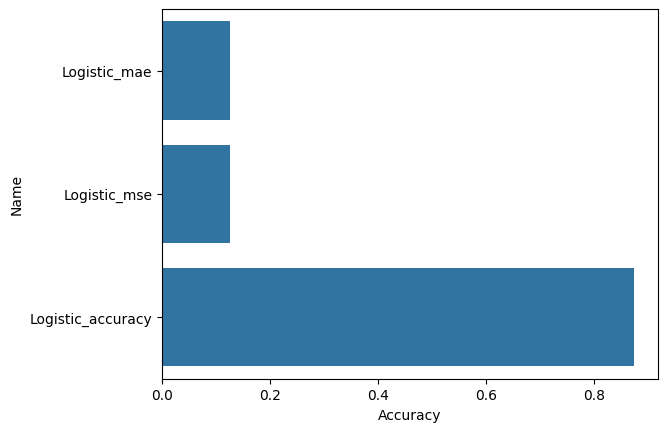

In [69]:
sns.barplot(x='Accuracy',y='Name',data = df_after_pred)